# TMDB movies

Load all the necessary packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.ticker
import seaborn as sns
from datetime import datetime

Load the dataset into a DataFrame and inspect the first rows of the DataFrame.

In [9]:
filepath = "TMDB-movies-small.csv"
data = pd.read_csv(filepath)
data.head(3)


,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,11,16,Dancer in the Dark,7.868,1697,Released,2000-09-01,40061153.0,140,12500000.0,...,"Drama, Crime","Lantia Cinema & Audiovisivi, Fine Line Feature...","Argentina, Denmark, Finland, France, Germany, ...",English,"Bobo Eriksson, Caroline Sascha Cogez, Bo Weste...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk
1,26,55,Amores Perros,7.600,2475,Released,2000-06-16,20908467.0,154,2000000.0,...,"Drama, Thriller","Altavista Films, Zeta Film",Mexico,Español,"Gerardo Campbell, Rosa María Bianchi, Ricardo ...",Alejandro González Iñárritu,Rodrigo Prieto,Guillermo Arriaga,"Martha Sosa Elizondo, Francisco González Compe...",Gustavo Santaolalla
2,31,64,Talk to Her,7.579,1233,Released,2002-03-15,64803131.0,112,0.0,...,"Drama, Romance","Vía Digital, Good Machine, El Deseo, Atresmedia",Spain,Español,"Carlos García Cambero, Leonor Watling, Pina Ba...",Pedro Almodóvar,Javier Aguirresarobe,Pedro Almodóvar,"Michel Ruben, Agustín Almodóvar","Alberto Iglesias, Vicente Amigo"


Create a new DataFrame with all the movies released in 2000. Tip: Format the release dates as pandas datetime objects. Inspect the amount of rows in the new DataFrame.

In [23]:
df = pd.DataFrame(data)
df["release_date"] = pd.to_datetime(df["release_date"])
release_2000 = df[df["release_date"].dt.year == 2000]
release_2000.shape[0]

2850

Create a new DataFrame df_topmovies which only incorporates the rows with the movies of the year 2000 who get an average score of at least 9. Compare the total rows of the original dataframe with df_topmovies. (Tip: use shape)

In [26]:
df_topmovies = release_2000[release_2000["vote_average"] >= 9]
df_topmovies.shape[0]

185

Replace all NaN's with 0.

In [32]:
df_topmovies["imdb_id"] = df_topmovies["imdb_id"].replace(np.nan, 0)
df_topmovies["overview"] = df_topmovies["overview"].replace(np.nan, 0)
df_topmovies["tagline"] = df_topmovies["tagline"].replace(np.nan, 0)
df_topmovies["genres"] = df_topmovies["genres"].replace(np.nan, 0)
df_topmovies["production_companies"] = df_topmovies["production_companies"].replace(np.nan, 0)
df_topmovies["production_countries"] = df_topmovies["production_countries"].replace(np.nan, 0)
df_topmovies["spoken_languages"] = df_topmovies["spoken_languages"].replace(np.nan, 0)
df_topmovies["producers"] = df_topmovies["producers"].replace(np.nan, 0)
df_topmovies["music_composer"] = df_topmovies["music_composer"].replace(np.nan, 0)
df_topmovies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1313 to 9390
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               185 non-null    int64         
 1   id                       185 non-null    int64         
 2   title                    185 non-null    object        
 3   vote_average             185 non-null    float64       
 4   vote_count               185 non-null    int64         
 5   status                   185 non-null    object        
 6   release_date             185 non-null    datetime64[ns]
 7   revenue                  185 non-null    float64       
 8   runtime                  185 non-null    int64         
 9   budget                   185 non-null    float64       
 10  imdb_id                  185 non-null    object        
 11  original_language        185 non-null    object        
 12  original_title           185 non-null

C:\Users\dagten.BWZ\AppData\Local\Temp\ipykernel_21052\3232694510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topmovies["imdb_id"] = df_topmovies["imdb_id"].replace(np.nan, 0)
C:\Users\dagten.BWZ\AppData\Local\Temp\ipykernel_21052\3232694510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topmovies["overview"] = df_topmovies["overview"].replace(np.nan, 0)
C:\Users\dagten.BWZ\AppData\Local\Temp\ipykernel_21052\3232694510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Plot the data using a graph with on the x-axis the release dates and on the y-axis the runtime of the film.
* Use appropriate labels and titles
* Change the ticks and tick labels so every month has a tick and as label the abbreviation of the month (Jan, Feb, March etc.)
* Change the color of the graph
* Show a grid
* Show the legend

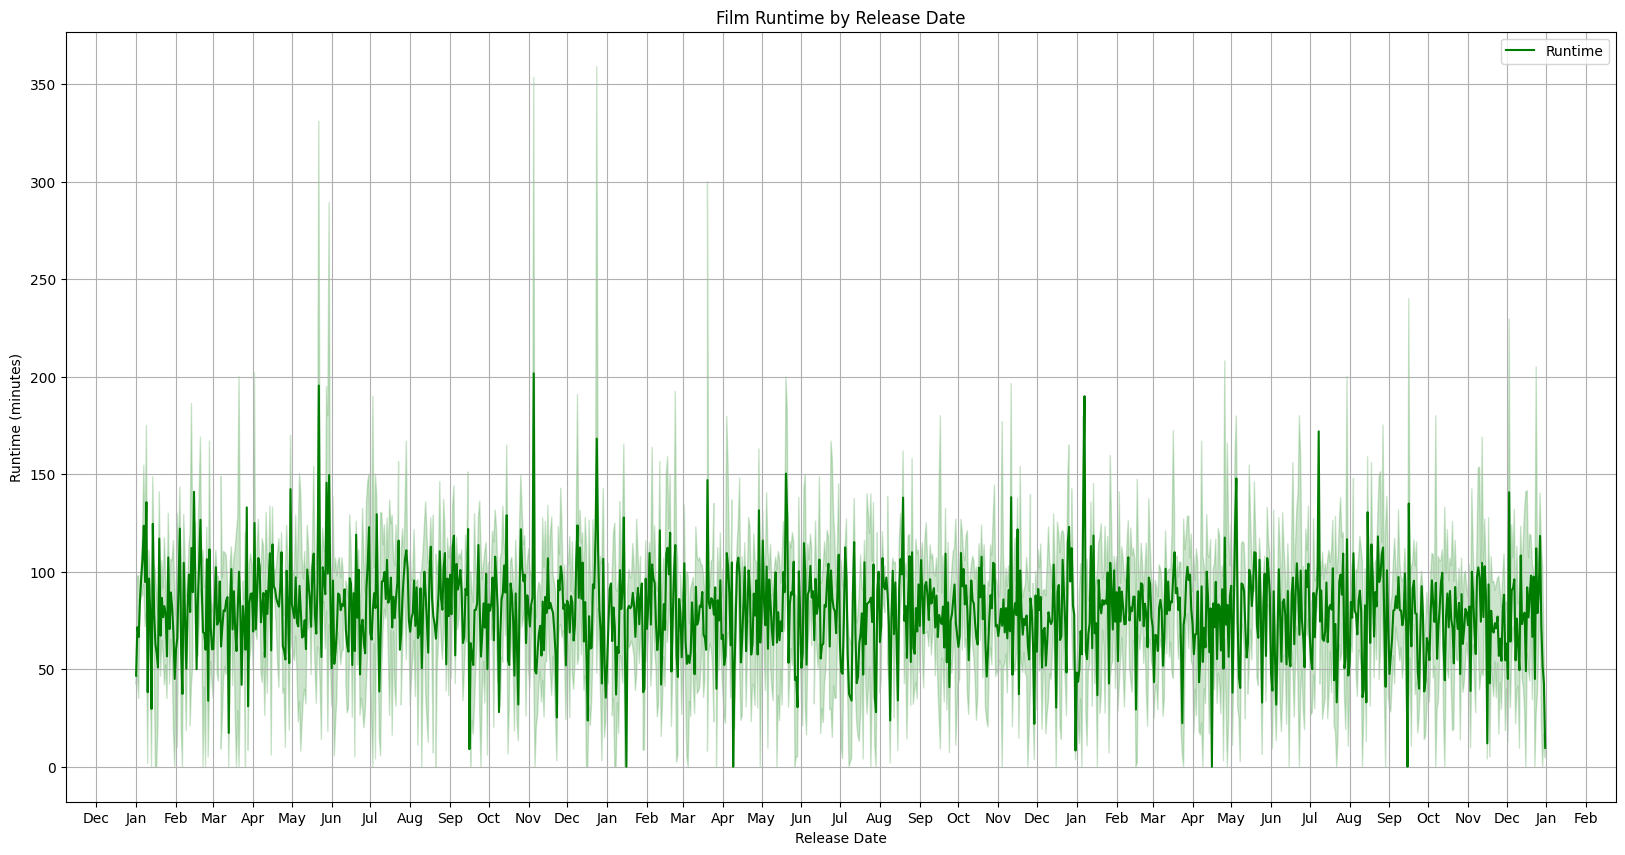

In [52]:
plt.figure(figsize=(20,10))

sns.lineplot(data=df, x='release_date', y='runtime', color="#007c00", label="Runtime").set(title='Film Runtime by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Runtime (minutes)')

plt.gca().xaxis.set_major_locator(md.MonthLocator())
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%b'))

plt.grid(True)
plt.legend()

plt.show()